### Some charts on inequality

In [38]:
%config Completer.use_jedi = False
import requests
import re
import pandas as pd
import numpy as np

import matplotlib.patches as patches
import matplotlib.pyplot as plt

### Download tables from BLS

In [2]:
for year in [2014, 2019]:
    url = ('https://www.bls.gov/cex/tables/calendar-year/'+
           'mean-item-share-average-standard-error/'+
           f'cu-income-deciles-before-taxes-{year}.xlsx')
    r = requests.get(url)

    with open(f'cex{year}.xlsx', 'wb') as f:
        f.write(r.content)
    print(f'Saved CEX file for {year}')

Saved CEX file for 2014
Saved CEX file for 2019


In [39]:
df = pd.read_excel('cex2019.xlsx', skiprows=2, index_col=0).iloc[[6,10,52, 582, 587, 597]].T
df.columns = ['Pre-tax income', 'After-tax income', 'Expenditure',
              'Wages and Salaries', 'Self-Employment', 'Capital']
df['Saving'] = df['After-tax income'] - df['Expenditure']
df['Market income'] = df[['Wages and Salaries', 'Self-Employment', 'Capital']].sum(axis=1)
df['Market saving'] = df['Market income'] - df['Expenditure']
cex_data = df
dec_names = list(df.iloc[1:].index)

/home/brian/miniconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


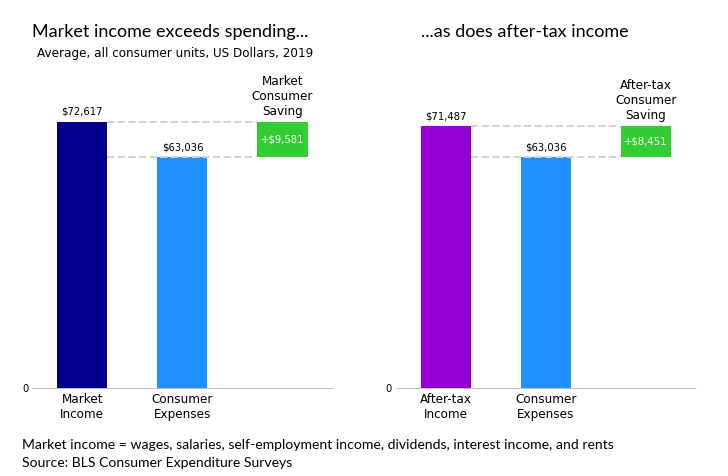

In [149]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, constrained_layout=True)

fig.set_figheight(6.5)
fig.set_figwidth(10)

# Spending is the same in both
exp = df.loc['All\nconsumer\nunits', 'Expenditure'] / 1000

for ax in [ax1, ax2]:
    ax.set_ylim(-22, 104)
    ax.set_xlim(0, 7)
    ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=0.5, color='gray')
    ax.text(0.3, -1, '0')
    ax.axis('off')
    # Consumer spending
    exp_bar = patches.Rectangle((3, 0), 1, exp, ec='none', fc='dodgerblue')
    ax.add_patch(exp_bar)
    ax.text(3.5, -8, 'Consumer\nExpenses', size=12, ha='center')
    ax.text(3.5, exp + 2, f'${exp*1000:,.0f}', ha='center')
    # Income measure
    income = df.loc['All\nconsumer\nunits', 'After-tax income'] / 1000
    facecolor = 'darkviolet'
    income_name = 'After-tax\nIncome'
    saving_name = 'After-tax\nConsumer\nSaving'
    if ax == ax1:
        income = df.loc['All\nconsumer\nunits', 'Market income'] / 1000
        facecolor = 'darkblue'
        income_name = 'Market\nIncome'
        saving_name = 'Market\nConsumer\nSaving'
    inc_bar = patches.Rectangle((1, 0), 1, income, ec='none', fc=facecolor)
    ax.add_patch(inc_bar)
    ax.text(1.5, income + 2, f'${income*1000:,.0f}', ha='center')
    ax.text(1.5, -8, income_name, size=12, ha='center')
    # Lines
    ax.hlines(y=income, xmin=2, xmax=5, linewidth=2, color='lightgray', linestyle='--')
    ax.hlines(y=exp, xmin=2, xmax=5, linewidth=2, color='lightgray', linestyle='--')
    
    #Saving
    save = income - exp
    save_bar = patches.Rectangle((5, exp), 1, save, ec='none', fc='limegreen')
    ax.add_patch(save_bar)
    ax.text(5.5, exp + (save/2) - 0.8, f'+${save*1000:,.0f}', color='white', ha='center')
    ax.text(5.5, income + 2, saving_name, size=12, ha='center')
    
# Titles
ax1.text(0.5, 96, 'Market income exceeds spending...', size=18, fontname='Lato')
ax2.text(1, 96, '...as does after-tax income', size=18, fontname='Lato')
ax1.text(0.6, 90.5, 'Average, all consumer units, US Dollars, 2019', size=12)

fig.text(0.025, 0.05, ('Market income = wages, salaries, self-employment income, '+
                       'dividends, interest income, and rents'), size=14, fontname='Lato')
ax1.text(0.3, -21.5, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')

plt.show()

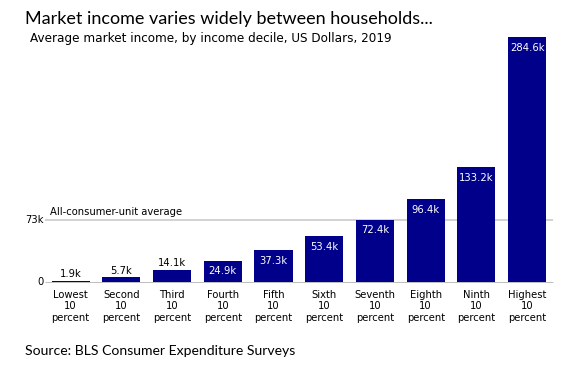

In [5]:
inc_dec = df['Market income'].iloc[1:]
inc_avg = df['Market income'].iloc[0]

fig, ax = plt.subplots()

fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-90, 320)
ax.set_xlim(-1, 21)
ax.hlines(y=0, xmin=0.5, xmax=20.5, linewidth=0.5, color='gray')
ax.text(0.2, -2.5, '0')
ax.axis('off')

for i, (name,value) in enumerate(inc_dec.to_dict().items()):
    x_loc = i*2+0.75
    inc_bar = patches.Rectangle((x_loc, 0), 1.5, value / 1000, ec='none', fc='darkblue')    
    ax.add_patch(inc_bar)
    text = f'{value/1000:.1f}k'
    textcolor = 'white'
    offset = -15
    if value < 20_000:
        textcolor = 'black'
        offset = 5
    ax.text(x_loc + 0.75, value / 1000 + offset, text, color=textcolor, ha='center')
    ax.text(x_loc + 0.75, -44, name, ha='center')
    
ax.hlines(y=inc_avg / 1000, xmin=0.5, xmax=20.5, linewidth=2, color='lightgray', zorder=0)
ax.text(-0.3, inc_avg / 1000 -2.5, f'{inc_avg/1000:.0f}k')
ax.text(0.7, inc_avg / 1000 +6, 'All-consumer-unit average')

# Titles
ax.text(-0.3, 300, 'Market income varies widely between households...', size=18, fontname='Lato')
ax.text(-0.1, 280, 'Average market income, by income decile, US Dollars, 2019', size=12)
ax.text(-0.3, -83, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
plt.show()

### Retrieve FRED series, calculate average market income

In [6]:
series_list = ['A576RC1', 'A041RC1', 'A048RC1', 'PIROA', 'POPTHM']
pi_data = pd.DataFrame()
for series in series_list:
    url = f'http://research.stlouisfed.org/fred2/series/{series}/downloaddata/{series}.csv'
    pi_data[series] = pd.read_csv(url, index_col='DATE', parse_dates=True)['VALUE']
    
pop = pi_data['POPTHM']
pi_data = pi_data.drop('POPTHM', axis=1)
mi_avg = pi_data.sum(axis=1).loc['2019'].mean() * 1000 / pop.loc['2019'].mean()
pi_data.to_csv('pi_data.csv')

In [7]:
pi_data = pd.read_csv('pi_data.csv', index_col='DATE')

### Read CPS Data

In [8]:
def weighted_percentile(group, percentile=0.5, weight='HSUP_WGT', val_var='HTOTVAL'):
    '''Return weighted percentile'''
    cum_sum = lambda x: x[weight].cumsum()
    
    # Sort wages then apply bin_cut and cum_sum
    df = (group.sort_values(val_var)
               .assign(CS = cum_sum))
    # Find the weight at the percentile of interest
    pct_wgt = df[weight].sum() * percentile
    # Find wage bin for person nearest to weighted percentile
    pct_val = df.iloc[df['CS'].searchsorted(pct_wgt)][val_var]
    
    return pct_val

In [9]:
path = '/home/brian/Documents/ASEC/data/'
datafile = 'pppub20.csv'

variables = ['MARSUPWT', 'PTOTVAL', 'PEARNVAL', 'ERN_VAL', 'PH_SEQ']
nmi = ['SS_VAL', 'SSI_VAL', 'UC_VAL', 'VET_VAL', 'WC_VAL', 'PAW_VAL']

df = pd.read_csv(f'{path}{datafile}', usecols=variables+nmi)
df['MARKET_INC'] = df['PTOTVAL'] - df[nmi].sum(axis=1)
df['HH_MI'] = df['MARKET_INC'].groupby(df['PH_SEQ']).transform('sum')

# Create groups
inc_group = (lambda x: np.where(x.MARKET_INC <= 0, '0', 
                       np.where(x.MARKET_INC < 12490, '0-12.4k',
                       np.where(x.MARKET_INC < (mi_avg * 1000), '12.4k-44.8k', '44.8k+'))))
df = df.assign(INC_GROUP = inc_group)
df = df.astype({'INC_GROUP': 'category'})

hh_mi = df.groupby('PH_SEQ').MARKET_INC.sum()
limits = list(pd.qcut(hh_mi, q=10).values.categories)

# Market income by percentile
result = pd.DataFrame()
for i in range(1, 100):
    i = i / 100.0
    val = weighted_percentile(df, percentile=i, weight='MARSUPWT', val_var='MARKET_INC') / 1000
    result.loc[f'{i * 100:.0f}', 'Market Income'] = val
    
# Composition of households
hh_comp = pd.DataFrame()
for i, limit in enumerate(limits):
    data = df.query('HH_MI >= @limit.left and HH_MI <= @limit.right')
    group = data.groupby('INC_GROUP').MARSUPWT.sum() / data.MARSUPWT.sum()
    hh_comp[i+1] = group
    
hh_comp.columns = dec_names

In [10]:
'...because markets only pay half of people...'

'...because markets only pay half of people...'

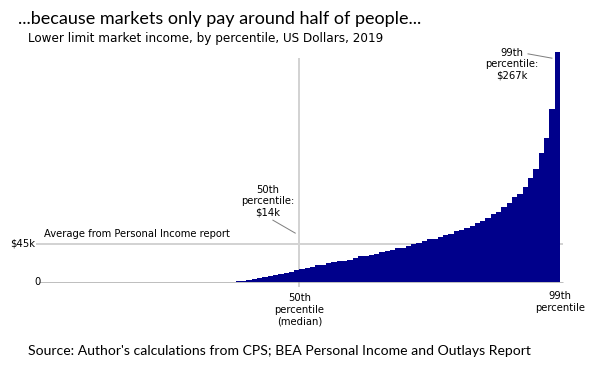

In [11]:
income_p = result

fig, ax = plt.subplots()
fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-90, 320)
ax.set_xlim(-5, 100)
ax.hlines(y=0, xmin=1, xmax=99.5, linewidth=0.5, color='gray')
ax.text(0.2, -2.5, '0')
ax.axis('off')

for i, (name,value) in enumerate(result['Market Income'].to_dict().items()):
    x_loc = i
    if value > 0:
        inc_bar = patches.Rectangle((x_loc, 0), 1, value, ec='none', fc='darkblue') 
        ax.add_patch(inc_bar)
        
ax.vlines(x=50, ymin=-5, ymax=260, linewidth=2, color='lightgray', zorder=0)
ax.text(50, -48, '50th\npercentile\n(median)', ha='center')
ax.text(99, -32, '99th\npercentile', ha='center')
    
ax.hlines(y=mi_avg , xmin=0.5, xmax=99.5, linewidth=2, color='lightgray', zorder=0)
ax.text(2, mi_avg +8, 'Average from Personal Income report')
ax.text(-4.5, mi_avg  -2.5, f'${mi_avg:.0f}k')

p99 = result.loc['99', 'Market Income']
ax.text(90, p99 - 30, f'99th\npercentile:\n${p99:.0f}k', ha='center')
plt.plot([93, 97.5], [265, 260], color='gray', linewidth=1)

p50 = result.loc['50', 'Market Income']
ax.text(44, 78, f'50th\npercentile:\n${p50:.0f}k', ha='center')
plt.plot([45, 49.2], [72, 57], color='gray', linewidth=1)

# Titles
ax.text(-3, 300, '...because markets only pay around half of people...', size=18, fontname='Lato')
ax.text(-1, 280, 'Lower limit market income, by percentile, US Dollars, 2019', size=12)
ax.text(-1, -83, "Source: Author's calculations from CPS; BEA Personal Income and Outlays Report", size=14, fontname='Lato')
plt.show()

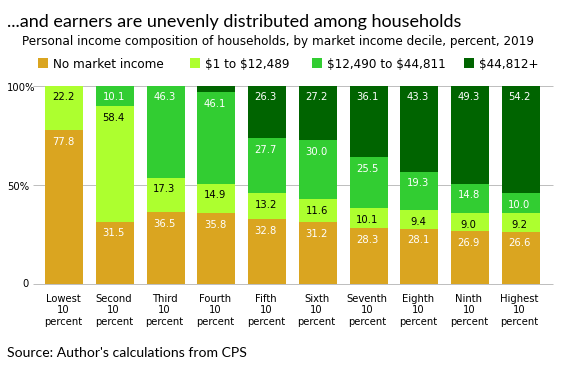

In [12]:
df = (hh_comp * 100).T

fig, ax = plt.subplots()
fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-38, 140)
ax.set_xlim(0, 11)
ax.hlines(y=0, xmin=0.5, xmax=10.75, linewidth=0.5, color='gray')
ax.text(0.3, -1, '0')
ax.hlines(y=50, xmin=0.5, xmax=10.75, linewidth=0.5, color='gray', zorder=0)
ax.text(0, 48, '50%')
ax.hlines(y=100, xmin=0.5, xmax=10.75, linewidth=0.5, color='gray', zorder=0)
ax.text(0, 98, '100%')
ax.axis('off')

for i, row in enumerate(df.iterrows()):
    zero_val = row[1].iloc[0]
    zero_bar = patches.Rectangle((i+0.75, 0), 0.75, zero_val, ec='none', fc='goldenrod')    
    ax.add_patch(zero_bar)
    ax.text(i+1.1, zero_val - 7, f'{zero_val:.1f}', ha='center', color='white')
    low_val = row[1].iloc[1]
    low_bar = patches.Rectangle((i+0.75, zero_val), 0.75, low_val, ec='none', fc='greenyellow')    
    ax.add_patch(low_bar)
    ax.text(i+1.1, zero_val + low_val - 7, f'{low_val:.1f}', ha='center')
    med_val = row[1].iloc[2]
    med_bar = patches.Rectangle((i+0.75, zero_val+low_val), 0.75, med_val, ec='none', fc='limegreen')    
    ax.add_patch(med_bar)
    if med_val > 9:
        ax.text(i+1.1, zero_val + low_val + med_val - 7, f'{med_val:.1f}', ha='center', color='white')
    high_val = row[1].iloc[3]
    high_bar = patches.Rectangle((i+0.75, zero_val+low_val+med_val), 0.75, high_val, ec='none', fc='darkgreen')    
    ax.add_patch(high_bar) 
    if high_val > 9:
        ax.text(i+1.1, zero_val + low_val + med_val + high_val - 7, f'{high_val:.1f}', ha='center', color='white')
    ax.text(i + 1.1, -20, row[0], ha='center')

# Legend
leg_zero = patches.Rectangle((0.6, 109), 0.2, 5, ec='none', fc='goldenrod')    
ax.add_patch(leg_zero)
ax.text(0.9, 109.6, 'No market income', size=12)
leg_low = patches.Rectangle((3.6, 109), 0.2, 5, ec='none', fc='greenyellow')    
ax.add_patch(leg_low)
ax.text(3.9, 109.6, '\$1 to \$12,489', size=12)
leg_med = patches.Rectangle((6.0, 109), 0.2, 5, ec='none', fc='limegreen')    
ax.add_patch(leg_med)
ax.text(6.3, 109.6, '\$12,490 to \$44,811', size=12)
leg_high = patches.Rectangle((9.0, 109), 0.2, 5, ec='none', fc='darkgreen')    
ax.add_patch(leg_high)
ax.text(9.3, 109.6, '\$44,812+', size=12)
    
# Titles
ax.text(0, 130, '...and earners are unevenly distributed among households', size=18, fontname='Lato')
ax.text(0.3, 121, 'Personal income composition of households, by market income decile, percent, 2019', size=12)
ax.text(0, -36, "Source: Author's calculations from CPS", size=14, fontname='Lato')    
plt.show()

Much of this story has to do with age

In [13]:
'Median personal income by age'

'Median personal income by age'

In [14]:
path = '/home/brian/Documents/ASEC/data/'
datafile = 'pppub20.csv'

variables = ['MARSUPWT', 'PTOTVAL', 'PEARNVAL', 'ERN_VAL', 'A_AGE']
nmi = ['SS_VAL', 'SSI_VAL', 'UC_VAL', 'VET_VAL', 'WC_VAL', 'PAW_VAL']

df = pd.read_csv(f'{path}{datafile}', usecols=variables+nmi)
df['MARKET_INC'] = df['PTOTVAL'] - df[nmi].sum(axis=1)
cum_sum = lambda x: x['MARSUPWT'].cumsum()
result1, result2 = pd.DataFrame(), pd.DataFrame()
for result, val_var in [(result1, 'MARKET_INC'), (result2, 'PEARNVAL')]:
    for percentile in [0.25, 0.5, 0.75]:
        for age in range(0, 81):
            data = (df.query('A_AGE >= @age - 1 and A_AGE <= @age + 1')
                      .sort_values(val_var)
                      .assign(CS = cum_sum))
            pct_wgt = int(data['MARSUPWT'].sum() * percentile)
            val = data.iloc[data['CS'].searchsorted(pct_wgt)][val_var]
            result.loc[f'{age:.0f}', percentile] = val / 1000

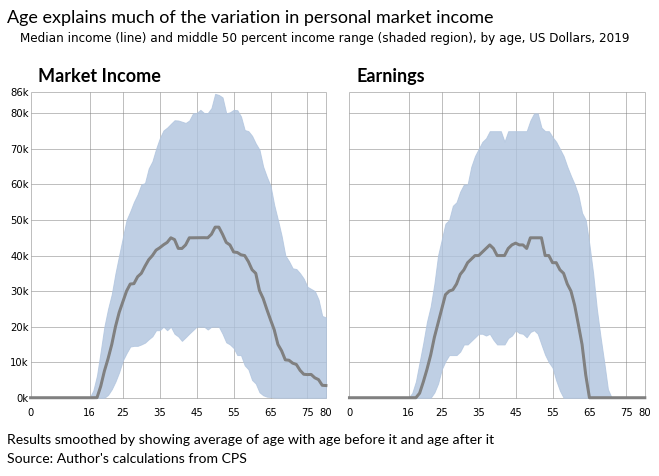

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, constrained_layout=True)

fig.set_figheight(6.5)
fig.set_figwidth(9.0)
for ax in [ax1, ax2]:
    ax.set_ylim(-20, 110)
    ax.set_xlim(-1, 82)
    for y_val in [0, 10, 20, 30, 40, 50, 60, 70, 80, 86]:
        ax.hlines(y=y_val, xmin=0, xmax=80, linewidth=0.5, color='gray', zorder=0)
        if ax == ax1:
            ax.text(-0.5, y_val-1, f'{y_val}k', ha='right')
    for age_val in [0, 16, 25, 35, 45, 55, 65, 75, 80]: 
        ax.vlines(x=age_val, ymin=0, ymax=86, linewidth=0.5, color='gray', zorder=0)
        ax.text(age_val, -5, f'{age_val}', ha='center')
    ax.axis('off')

ax1.fill_between(result1.index, result1[0.25].values, result1[0.75].values, color='lightsteelblue', alpha=0.8)
ax1.plot(result1.index, result1[0.5].values, color='gray', lw=3)
ax1.text(2, 89, 'Market Income', size=18, fontname='Lato', weight='bold')

ax2.fill_between(result2.index, result2[0.25].values, result2[0.75].values, color='lightsteelblue', alpha=0.8)
ax2.plot(result2.index, result2[0.5].values, color='gray', lw=3)
ax2.text(2, 89, 'Earnings', size=18, fontname='Lato', weight='bold')

# Titles
fig.text(0, 0.96, 'Age explains much of the variation in personal market income', size=18, fontname='Lato')
fig.text(0.02, 0.92, 'Median income (line) and middle 50 percent income range (shaded region), by age, US Dollars, 2019', size=12)
fig.text(0, 0.06, "Results smoothed by showing average of age with age before it and age after it", size=14, fontname='Lato')
fig.text(0, 0.02, "Source: Author's calculations from CPS", size=14, fontname='Lato')
plt.show()

In [16]:
'But even those in prime working age can be sidelined'

'But even those in prime working age can be sidelined'

In [17]:
'Market income is mostly labor income, even at the top'

'Market income is mostly labor income, even at the top'

In [18]:
df = cex_data

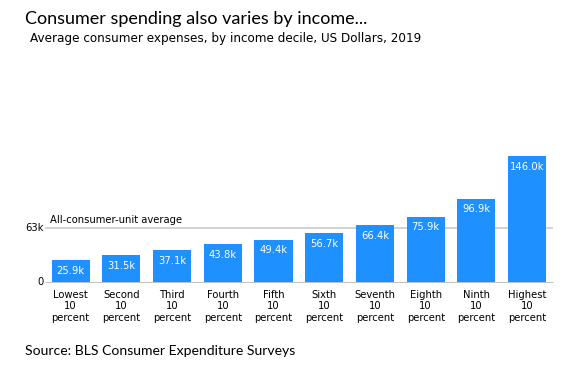

In [19]:
exp_dec = df['Expenditure'].iloc[1:]
exp_avg = df['Expenditure'].iloc[0]

fig, ax = plt.subplots()

fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-90, 320)
ax.set_xlim(-1, 21)
ax.hlines(y=0, xmin=0.5, xmax=20.5, linewidth=0.5, color='gray')
ax.text(0.2, -2.5, '0')
ax.axis('off')

for i, (name,value) in enumerate(exp_dec.to_dict().items()):
    x_loc = i*2+0.75
    dec_bar = patches.Rectangle((x_loc, 0), 1.5, value / 1000, ec='none', fc='dodgerblue')    
    ax.add_patch(dec_bar)
    text = f'{value/1000:.1f}k'
    ax.text(x_loc + 0.75, value / 1000 - 15, text, color='white', ha='center')
    ax.text(x_loc + 0.75, -44, name, ha='center')
    
ax.hlines(y=exp_avg / 1000, xmin=0.5, xmax=20.5, linewidth=2, color='lightgray', zorder=0)
ax.text(-0.3, exp_avg / 1000 -2.5, f'{exp_avg/1000:.0f}k')
ax.text(0.7, exp_avg / 1000 +6, 'All-consumer-unit average')

# Titles
ax.text(-0.3, 300, 'Consumer spending also varies by income...', size=18, fontname='Lato')
ax.text(-0.1, 280, 'Average consumer expenses, by income decile, US Dollars, 2019', size=12)
ax.text(-0.3, -83, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
plt.show()

In [20]:
'...but spending is more similar across households'

'...but spending is more similar across households'

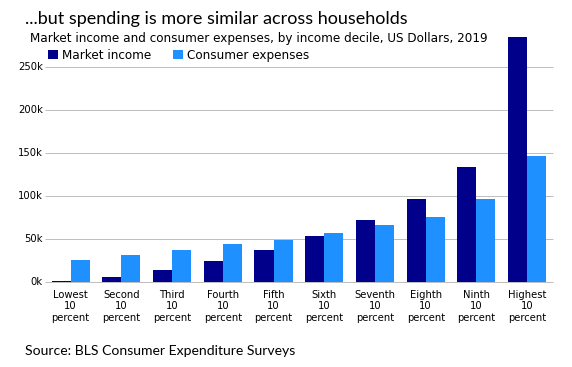

In [21]:
exp_dec = df['Expenditure'].iloc[1:]
inc_dec = df['Market income'].iloc[1:]

fig, ax = plt.subplots()

fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-90, 320)
ax.set_xlim(-1, 21)
ax.axis('off')
for v in [0, 50, 100, 150, 200, 250]:
    ax.hlines(y=v, xmin=0.5, xmax=20.5, linewidth=0.5, color='gray', zorder=0)
    ax.text(0.4, v-2.5, f'{v}k', ha='right')


for i, (name,value) in enumerate(exp_dec.to_dict().items()):
    x_loc = i*2+0.75
    dec_bar = patches.Rectangle((x_loc+0.75, 0), 0.75, value / 1000, ec='none', fc='dodgerblue')    
    ax.add_patch(dec_bar)
    ax.text(x_loc + 0.75, -44, name, ha='center')
for i, (name,value) in enumerate(inc_dec.to_dict().items()):    
    x_loc = i*2+0.75
    inc_bar = patches.Rectangle((x_loc, 0), 0.75, value / 1000, ec='none', fc='darkblue')    
    ax.add_patch(inc_bar)
    
# Legend
leg_zero = patches.Rectangle((0.6, 259.6), 0.4, 10, ec='none', fc='darkblue')    
ax.add_patch(leg_zero)
ax.text(1.15, 259.6, 'Market income', size=12)
leg_low = patches.Rectangle((5.55, 259.6), 0.4, 10, ec='none', fc='dodgerblue')    
ax.add_patch(leg_low)
ax.text(6.1, 259.6, 'Consumer expenses', size=12)


# Titles
ax.text(-0.3, 300, '...but spending is more similar across households', size=18, fontname='Lato')
ax.text(-0.1, 280, 'Market income and consumer expenses, by income decile, US Dollars, 2019', size=12)
ax.text(-0.3, -83, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
plt.show()

In [22]:
'Some categories of spending are less-discretionary'

'Some categories of spending are less-discretionary'

In [23]:
df = pd.read_excel('cex2019.xlsx', skiprows=2, index_col=0).iloc[[57, 199, 462, 52]].T
df.columns = ['Food', 'Housing', 'Healthcare', 'Total']
df['Nondisc'] = df[['Food', 'Housing', 'Healthcare']].sum(axis=1)
df['Disc'] = df['Total'] - df['Nondisc']
df = df.loc[:, ['Nondisc', 'Disc']].iloc[1:] / 1000
share = (df['Nondisc'] / df.sum(axis=1)) * 200

/home/brian/miniconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


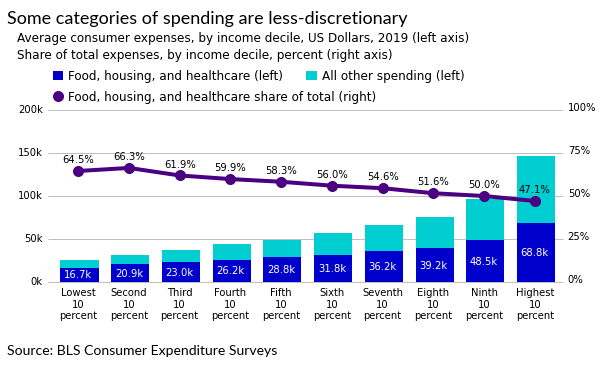

In [24]:
fig, ax = plt.subplots()
fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-90, 320)
ax.set_xlim(0, 11)
for v in [0, 50, 100, 150, 200]:
    ax.hlines(y=v, xmin=0.5, xmax=10.65, linewidth=0.5, color='gray', zorder=0)
    ax.text(0.4, v-2.5, f'{v}k', ha='right')
    ax.text(10.75, v, f'{v/2:.0f}%', ha='left')
ax.axis('off')

for i, row in enumerate(df.iterrows()):
    zero_val = row[1].iloc[0]
    zero_bar = patches.Rectangle((i+0.75, 0), 0.75, zero_val, ec='none', fc='mediumblue')    
    ax.add_patch(zero_bar)
    low_val = row[1].iloc[1]
    low_bar = patches.Rectangle((i+0.75, zero_val), 0.75, low_val, ec='none', fc='darkturquoise')    
    ax.add_patch(low_bar)
    ax.text(i + 1.1, -42, row[0], ha='center')
    ax.text(i + 1.1, share.iloc[i] + 10, f'{share.iloc[i] / 2:.1f}%', ha='center')
    ax.text(i + 1.1, (zero_val / 2) - 3, f'{zero_val:.1f}k', ha='center', color='white')
    
ax.plot([i + 0.1 for i in range(1, 11)], share.values, color='indigo', lw=4, marker='o', markersize=10)

# Legend
leg_zero = patches.Rectangle((0.6, 235), 0.2, 10, ec='none', fc='mediumblue')    
ax.add_patch(leg_zero)
ax.text(0.9, 235.6, 'Food, housing, and healthcare (left)', size=12)
leg_low = patches.Rectangle((5.6, 235), 0.2, 10, ec='none', fc='darkturquoise')    
ax.add_patch(leg_low)
ax.text(5.9, 235.6, 'All other spending (left)', size=12)

ax.plot(0.7, 216, color='indigo', marker='o', markersize=10)
ax.text(0.9, 211.6, 'Food, housing, and healthcare share of total (right)', size=12)
    
# Titles
ax.text(-0.3, 300, 'Some categories of spending are less-discretionary', size=18, fontname='Lato')
ax.text(-0.1, 280, 'Average consumer expenses, by income decile, US Dollars, 2019 (left axis)', size=12)
ax.text(-0.1, 260, 'Share of total expenses, by income decile, percent (right axis)', size=12)
ax.text(-0.3, -83, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
plt.show()

In [46]:
inc_dec[0]

1881.0

In [25]:
'Market-income-based saving varies by income level'

'Saving varies by income level'

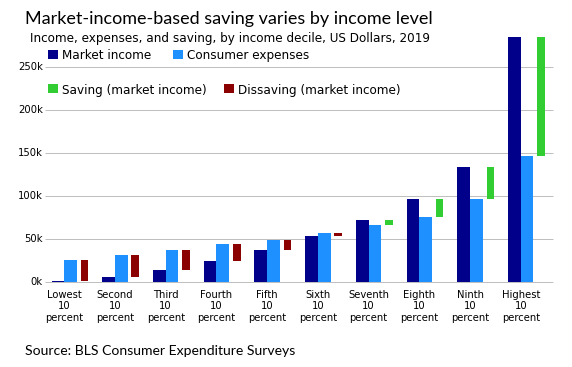

In [66]:
exp_dec = df['Expenditure'].iloc[1:]
inc_dec = df['Market income'].iloc[1:]
sav_dec = df['Market saving'].iloc[1:]

fig, ax = plt.subplots()

fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-90, 320)
ax.set_xlim(-1, 21)
ax.axis('off')
for v in [0, 50, 100, 150, 200, 250]:
    ax.hlines(y=v, xmin=0.5, xmax=20.5, linewidth=0.5, color='gray', zorder=0)
    ax.text(0.4, v-2.5, f'{v}k', ha='right')


for i, (name,value) in enumerate(exp_dec.to_dict().items()):
    x_loc = i*2+0.5
    dec_bar = patches.Rectangle((x_loc+0.75, 0), 0.5, value / 1000, ec='none', fc='dodgerblue')    
    ax.add_patch(dec_bar)
    ax.text(x_loc + 0.75, -44, name, ha='center')
for i, (name,value) in enumerate(inc_dec.to_dict().items()):    
    x_loc = i*2+0.75
    inc_bar = patches.Rectangle((x_loc, 0), 0.5, value / 1000, ec='none', fc='darkblue')    
    ax.add_patch(inc_bar)
for i, (name,value) in enumerate(sav_dec.to_dict().items()):    
    x_loc = i*2+0.5
    if value >= 0:
        color='limegreen'
    else:
        color='darkred'
    sav_bar = patches.Rectangle((x_loc+1.4, exp_dec[i] / 1000), 0.3, value / 1000, ec='none', fc=color)    
    ax.add_patch(sav_bar)
    
# Legend
leg_zero = patches.Rectangle((0.6, 259.6), 0.4, 10, ec='none', fc='darkblue')    
ax.add_patch(leg_zero)
ax.text(1.15, 259.6, 'Market income', size=12)
leg_low = patches.Rectangle((5.55, 259.6), 0.4, 10, ec='none', fc='dodgerblue')    
ax.add_patch(leg_low)
ax.text(6.1, 259.6, 'Consumer expenses', size=12)
saving = patches.Rectangle((0.6, 219.6), 0.4, 10, ec='none', fc='limegreen')    
ax.add_patch(saving)
ax.text(1.15, 219.6, 'Saving (market income)', size=12)
dissaving = patches.Rectangle((7.55, 219.6), 0.4, 10, ec='none', fc='darkred')    
ax.add_patch(dissaving)
ax.text(8.1, 219.6, 'Dissaving (market income)', size=12)


# Titles
ax.text(-0.3, 300, 'Market-income-based saving varies by income level', size=18, fontname='Lato')
ax.text(-0.1, 280, 'Income, expenses, and saving, by income decile, US Dollars, 2019', size=12)
ax.text(-0.3, -83, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
plt.show()

In [ ]:
'With market income alone, most households are dissaving'

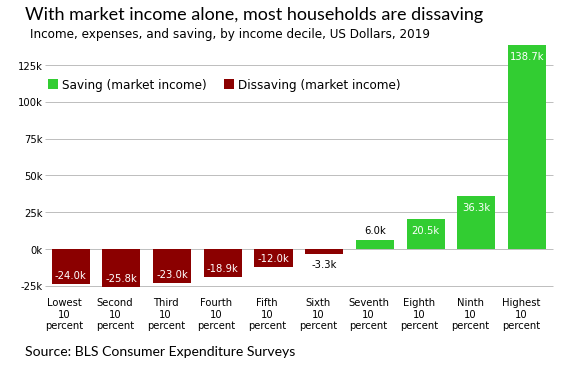

In [125]:
exp_dec = df['Expenditure'].iloc[1:]
inc_dec = df['Market income'].iloc[1:]
sav_dec = df['Market saving'].iloc[1:]

fig, ax = plt.subplots()

fig.set_figheight(6.5)
fig.set_figwidth(10)
ax.set_ylim(-80, 160)
ax.set_xlim(-1, 21)
ax.axis('off')
for v in [-25, 0, 25, 50, 75, 100, 125]:
    ax.hlines(y=v, xmin=0.5, xmax=20.5, linewidth=0.5, color='gray', zorder=0)
    ax.text(0.4, v-2.5, f'{v}k', ha='right')

for i, (name,value) in enumerate(sav_dec.to_dict().items()):    
    x_loc = i*2+0.5
    fontcolor = 'white'
    if value >= 0:
        color='limegreen'
        diffval = -10
    else:
        color='darkred'
        diffval = +4
    if abs(value / 1000) < 12:
        fontcolor='black'
        diffval = -diffval - 5
    sav_bar = patches.Rectangle((x_loc+0.25, 0), 1.5, value / 1000, ec='none', fc=color)    
    ax.add_patch(sav_bar)
    ax.text(x_loc + 0.75, -54, name, ha='center')
    ax.text(x_loc + 1, (value / 1000) + diffval, f'{value/1000:.1f}k', ha='center', color=fontcolor)
    
# Legend
saving = patches.Rectangle((0.6, 108.6), 0.4, 7, ec='none', fc='limegreen')    
ax.add_patch(saving)
ax.text(1.15, 109, 'Saving (market income)', size=12)
dissaving = patches.Rectangle((7.55, 108.6), 0.4, 7, ec='none', fc='darkred')    
ax.add_patch(dissaving)
ax.text(8.1, 109, 'Dissaving (market income)', size=12)


# Titles
ax.text(-0.3, 156, 'With market income alone, most households are dissaving', size=18, fontname='Lato')
ax.text(-0.1, 144, 'Income, expenses, and saving, by income decile, US Dollars, 2019', size=12)
ax.text(-0.3, -72, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
plt.show()

In [ ]:
'Average saving is much higher than typical saving'

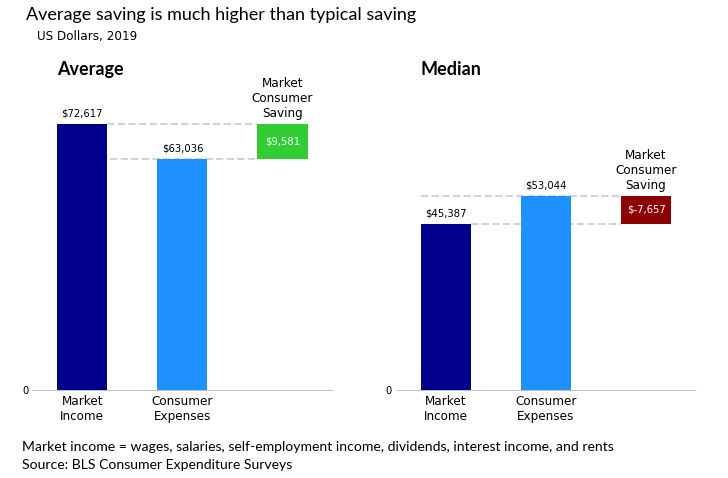

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, constrained_layout=True)

fig.set_figheight(6.5)
fig.set_figwidth(10)

for ax in [ax1, ax2]:
    ax.set_ylim(-22, 104)
    ax.set_xlim(0, 7)
    ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=0.5, color='gray')
    ax.text(0.3, -1, '0')
    ax.axis('off')
    # Consumer spending
    exp = df.loc['Fifth\n10\npercent':'Sixth\n10\npercent', 'Expenditure'].mean() / 1000
    if ax == ax1:
        exp = df.loc['All\nconsumer\nunits', 'Expenditure'] / 1000
    exp_bar = patches.Rectangle((3, 0), 1, exp, ec='none', fc='dodgerblue')
    ax.add_patch(exp_bar)
    ax.text(3.5, -8, 'Consumer\nExpenses', size=12, ha='center')
    ax.text(3.5, exp + 2, f'${exp*1000:,.0f}', ha='center')
    # Income measure
    income = df.loc['Fifth\n10\npercent':'Sixth\n10\npercent', 'Market income'].mean() / 1000
    income_name = 'After-tax\nIncome'
    if ax == ax1:
        income = df.loc['All\nconsumer\nunits', 'Market income'] / 1000
    saving_name = 'Market\nConsumer\nSaving'
    inc_bar = patches.Rectangle((1, 0), 1, income, ec='none', fc='darkblue')
    ax.add_patch(inc_bar)
    ax.text(1.5, income + 2, f'${income*1000:,.0f}', ha='center')
    ax.text(1.5, -8, 'Market\nIncome', size=12, ha='center')
    # Lines
    ax.hlines(y=income, xmin=2, xmax=5, linewidth=2, color='lightgray', linestyle='--', zorder=0)
    ax.hlines(y=exp, xmin=1, xmax=5, linewidth=2, color='lightgray', linestyle='--', zorder=0)
    
    #Saving
    save = income - exp
    topval = exp
    color = 'darkred'
    if income > exp:
        topval = income
        color = 'limegreen'
    save_bar = patches.Rectangle((5, exp), 1, save, ec='none', fc=color)
    ax.add_patch(save_bar)
    ax.text(5.5, exp + (save/2) - 0.8, f'${save*1000:,.0f}', color='white', ha='center')
    ax.text(5.5, topval + 2, saving_name, size=12, ha='center')
    
# Titles
fig.text(0.03, 0.97, 'Average saving is much higher than typical saving', size=18, fontname='Lato')
ax1.text(0.6, 95.5, 'US Dollars, 2019', size=12)

fig.text(0.025, 0.05, ('Market income = wages, salaries, self-employment income, '+
                       'dividends, interest income, and rents'), size=14, fontname='Lato')
ax1.text(0.3, -21.5, 'Source: BLS Consumer Expenditure Surveys', size=14, fontname='Lato')
ax1.text(1, 86, 'Average', size=18, fontname='Lato', weight='bold')
ax2.text(1, 86, 'Median', size=18, fontname='Lato', weight='bold')

plt.show()

In [ ]:
'Many households accumulate debt, others accumulate assets'

In [26]:
'And some households contain fewer non-workers'

'And some households contain fewer non-workers'